In [1]:
import IPython.display as ipd

import numpy as np
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import math

TAU = math.pi * 2

In [2]:
def chirp_exponential(fs, t, f1, f0, k):
    # constants
    T = int(fs * t)
    pd0 = f0 / fs
    F1 = f1
    
    # state
    p0 = 0.
    p1 = 0.
    
    # generate signal
    signal = []
    for x in list(range(T)):    
        # chirp signal
        y = math.sin(TAU * (p0 + p1))
        signal.append(y)
        
        # curve
        c = 1.0 - (x**k / T**k)
        f1 = c * F1

        # phase accumulators
        p0 += pd0
        if p0 >= 1.:
            p0 -= 1.
        p1 += (f1 / fs) 
        if p1 >= 1.:
            p1 -= 1.
        
    return signal

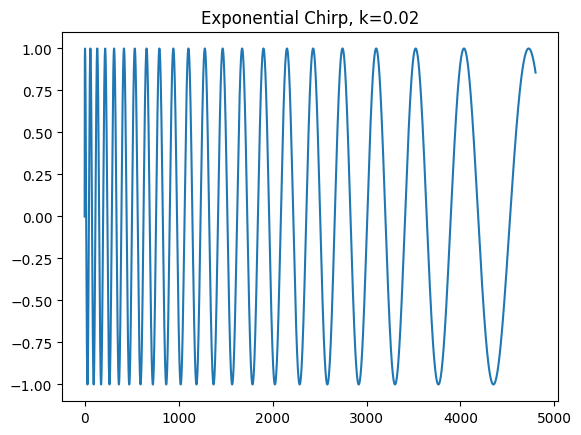

In [3]:
fs = 48000.
T  = 0.1
k  = 0.02
signal = chirp_exponential(fs, T, 8000., 55., k)

ys = np.array(signal)
xs = np.arange(ys.size)
plt.title(f"Exponential Chirp, k={k}")
plt.plot(xs, ys)
plt.show()

import IPython.display as ipd
ipd.Audio(signal, rate=fs)